In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [65]:
dataset = pd.read_csv('/content/breast cancer prediction.csv')

In [66]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [67]:
dataset.shape

(569, 33)

In [68]:
dataset.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [69]:
dataset = dataset.drop(columns='Unnamed: 32' , axis =1)

In [70]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [71]:
dataset.replace({ 'diagnosis':{'M':0,'B':1}},inplace=True)

/tmp/ipython-input-71-623916434.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({ 'diagnosis':{'M':0,'B':1}},inplace=True)


In [72]:
x = dataset.drop(columns=['id','diagnosis'],axis=1)
y = dataset['diagnosis']

In [73]:
print(x)
print(y)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,stratify=y,random_state=2)

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler  = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [77]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [78]:
#setting up hte layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(30,)),
    keras.layers.Dense(20,activation = 'relu'),
    keras.layers.Dense(2,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [79]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [80]:
history = model.fit(x_train_std,y_train , validation_split=0.1,epochs=12)

Epoch 1/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6613 - loss: 0.5821 - val_accuracy: 0.7174 - val_loss: 0.5109
Epoch 2/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8531 - loss: 0.3692 - val_accuracy: 0.8261 - val_loss: 0.3794
Epoch 3/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9125 - loss: 0.2662 - val_accuracy: 0.8696 - val_loss: 0.3126
Epoch 4/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9264 - loss: 0.2132 - val_accuracy: 0.9130 - val_loss: 0.2731
Epoch 5/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9372 - loss: 0.1828 - val_accuracy: 0.9130 - val_loss: 0.2457
Epoch 6/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9442 - loss: 0.1626 - val_accuracy: 0.9130 - val_loss: 0.2243
Epoch 7/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9472 - loss: 0.1473 - val_accuracy: 0.9130 - val_loss: 0.2068
Epoch 8/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9540 - loss: 0.1351 - val_accuracy: 0.9565 - val_loss

In [81]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'epoch')

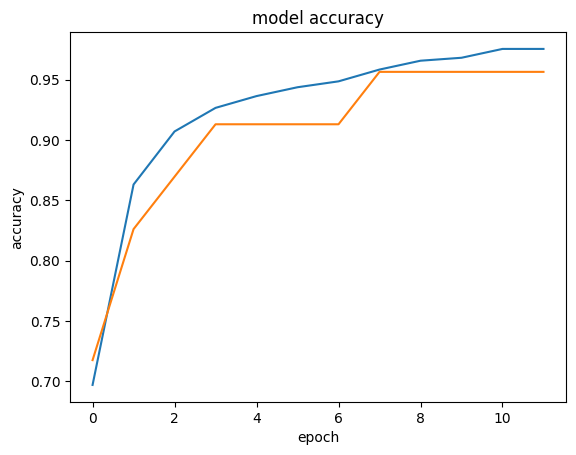

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [83]:
loss, accuracy = model.evaluate(x_test_std , y_test)
print(accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9801 - loss: 0.0879 
0.9736841917037964


In [84]:
print(x_test_std.shape)
print(x_test_std[0])

(114, 30)
[ 0.44199702  0.212229    0.42163229  0.28029849  0.46059068  0.31923771
  0.32738868  0.3980721   0.45467963  0.05268291 -0.22649032 -0.56019683
 -0.32014237 -0.19125366 -0.76043663 -0.08046584 -0.26006979 -0.51214349
 -0.33901861 -0.23280218  0.65164049  0.74215747  0.53471259  0.33156671
  1.02726691  1.30534397  0.62768506  0.50566574  1.76577066  1.29575996]


In [85]:
y_pred = model.predict(x_test_std)
print(y_pred.shape)
print(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
(114, 2)
[[8.15350831e-01 1.15537859e-01]
 [9.66193601e-02 9.76463854e-01]
 [1.47128597e-01 8.39216948e-01]
 [1.20144270e-01 9.59015429e-01]
 [1.05839513e-01 9.10564303e-01]
 [4.49081272e-01 6.29229307e-01]
 [7.61926770e-02 7.97641098e-01]
 [1.65599853e-01 8.45534623e-01]
 [1.01350404e-01 8.46281350e-01]
 [5.42183816e-02 8.00336659e-01]
 [6.90554202e-01 5.72294630e-02]
 [7.31922746e-01 8.72485638e-02]
 [8.59162062e-02 9.62449074e-01]
 [6.80200532e-02 5.60271442e-01]
 [9.37366426e-01 1.51819121e-02]
 [5.12774110e-01 7.06278026e-01]
 [9.79598984e-02 9.66592908e-01]
 [5.02906889e-02 9.59007442e-01]
 [1.77932024e-01 7.64432490e-01]
 [4.55359370e-01 5.23293972e-01]
 [5.76684058e-01 4.19770777e-01]
 [8.59601855e-01 8.91636610e-02]
 [5.94494164e-01 9.33813304e-03]
 [1.92664370e-01 8.26891780e-01]
 [2.93119520e-01 8.95588398e-01]
 [1.69249073e-01 9.66759920e-01]
 [7.19870508e-01 2.06798673e-01]
 [7.00562239e-01 1.04661146e-02]
 [3.18109483e-01 6.25447094e-

In [86]:
#converting the prediction probability to class labels
y_pred_labels = np.argmax(y_pred,axis=1)
print(y_pred_labels)

[0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0
 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0
 0 0 1]


In [90]:
input_data = (11.42	,20.38	,77.58	,386.1	,0.1425	,0.2839	,0.2414	,0.1052	,0.2597	,0.09744	,0.4956	,1.156	,3.445	,27.23	,0.00911	,0.07458	,0.05661	,0.01867	,0.05963	,0.009208	,14.91	,26.5	,98.87	,567.7	,0.2098	,0.8663	,0.6869	,0.2575	,0.6638	,0.173)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
input_data_std = scaler.transform(input_data_reshaped)
prediction = model.predict(input_data_std)
print(prediction)
label = [np.argmax(prediction)]
print(label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[0.83734125 0.01745515]]
[np.int64(0)]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
